In [13]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np
import re
from eunjeon import Mecab

In [14]:
정상기업 = pd.read_csv('./data/정상기업뉴스.csv')
data=정상기업

In [15]:
data[:5]

,기업,기사발행일,기사제목,뉴스기사본문
0,씨제이이엔엠,2011.12.13. 오전 8:24,"씨제이이엔엠, 유형자산 취득 후 처분 예정",씨제이이엔엠은 1276억 7200만원 규모의 유형자산을 취득한다고 13일 공시했다....
1,씨제이이엔엠,2011.08.16. 오전 9:21,"코스닥, IT부품주 '훨훨'",16일 코스닥 시장에서는 IT부품주들이 강세를 보이고 있다. 특히 구글의 모토로라 ...
2,씨제이이엔엠,2011.06.08. 오전 7:58,장마감후 주요 종목뉴스-7일,[머니투데이 정영일 기자]◇코스피 시장\n△CJ는 법인청산에 따라 CJ푸드서비스를 ...
3,씨제이이엔엠,2011.06.07. 오후 5:31,"CJ, CJ푸드서비스 계열사서 제외",[머니투데이 김선주 기자]CJ는 법인청산에 따라 CJ푸드서비스를 계열사에서 제외한다...
4,씨제이이엔엠,2011.11.17. 오전 8:47,시초가 소폭 하락 예상 - 코스닥 동시호가,17일 코스닥 시장은 소폭 하락 출발이 예상된다.\n\n코스닥 시장은 현재 시가총액...


In [16]:
제거할기사제목 = ['증시 일정', '증시일정', '장마감후', '장 마감 후', '장마감공시', '증시 캘린더', '재송', '투자정보', \
    '코스닥 기업공시', '장중 주요', '코스닥 3분기 결산', '주요 뉴스 및 공시', '기업공시',' 기업 공시', '장 종료 후', \
        '특징주A/S', '주요 정보', '오전 공시', '투자정보', '기업 공시', '오늘의 메모', '재테크 캘린더', '추천주 정리', '희망복원 주식클리닉', \
        '\d{1,2}월 \d{1,2}일', '오늘의 주요 공시', '코스닥 공시', '코스닥 메모', '대박 공모주', '<표>', '오늘의 리포트', \
        '공략주', '주식상담소', '주식왕 따라잡기', '주식컨설팅', '\d{4} 증시', '춤추는 테마주', '개장시황', \
        '폭등신호 터진', '대폭등', '매드머니', '주담과 Q&A', '굿바이 \d{4}', '지금 당장 사라', '폭등주', \
        '\d{4}%', '김정일 사망', '종목대탐험', '종목신호등', 'VIP CLUB', '수급유망주', '기상도', '중소형주', \
        '국민주식고충처리반', '유망주', '머니Q', '시초가잡아라', '기관 Q&A', '부동산에 투자하려면', '베스트애널리스트', \
        '코스닥협회장 취임', '코스닥협회', '부동산에 투자하는 방법', '국가품질 경영대회', '증시일정', '머니Q', '추천종목', '티타임 공략주', \
        '수급유망주', '종목배틀', '\d{4} 증시 결산', '기업설명회', '종목신호등', 'VIP CLUB 추천주', '내일장 공략주 10선', '주간컨센서스동향', \
        '주담과 Q&A', '조회공시', '주가급등 사유', '관련株들', '게임株', '이시각 Up&Down', '장내 매도', '[인사]', '증시기상도', \
        '[재송]', '마감시황', '주식부자 속출', '교육주', '티타임 공략주', '\d{1,2}일 증권사 추천종목', '기업IR소식', '[승부주]']
# 제거제목리스트=[]
제거제목리스트 = '|'.join(제거할기사제목)
data_unique = data.drop_duplicates(['뉴스기사본문'])
data_result = data_unique[~data_unique['기사제목'].str.contains(제거제목리스트, na=False, case=False)]
#data_result.to_csv('dd.csv')
pattern1 = r'\([^)]*\)'
#pattern2 = r'\[[^)]*\]'
pattern2 = r"\[([^]]+)\]"



# data_unique['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_unique['뉴스기사본문']]
# data_unique['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_unique['뉴스기사본문전처리']]
# data_unique
# data_unique.to_csv('dd.csv', index=None)





data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[^/^$|\s+/가-힣\.]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('[[ \s]{2,}\.{2,}]', '', s) for s in data_result['뉴스기사본문전처리']]
data_result['뉴스기사본문전처리'] = [re.sub('\n', '', s) for s in data_result['뉴스기사본문전처리']]
data_result
data_result.to_csv('dd.csv', index=None)

C:\Users\jangd\AppData\Local\Temp\ipykernel_27748\696962634.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern1, '', s) for s in data_result['뉴스기사본문']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_27748\696962634.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_result['뉴스기사본문전처리'] = [re.sub(pattern2, '', s) for s in data_result['뉴스기사본문전처리']]
C:\Users\jangd\AppData\Local\Temp\ipykernel_27748\696962634.py:38: SettingWithCopyWarning: 
A value is trying to be

In [17]:
train_data = pd.read_csv('./dd.csv')


In [18]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [19]:
# 형태소 분석기 mecab를 사용한 토큰화 작업 (다소 시간 소요)

mecab = Mecab()
tokenized_data = []
output=[]
for sentence in train_data['뉴스기사본문전처리']:
    temp_X = mecab.nouns(sentence)  # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords]  # 불용어 제거

    tokenized_data.append(temp_X)

한글자 제거

In [20]:
remove_one_word=[]
for j in range(len(tokenized_data)):
    a=[x for x in tokenized_data[j] if len(x)>1]
    remove_one_word.append(a)

In [22]:
remove_one_word
len(remove_one_word)
list_text_1=sum(remove_one_word, [])

In [23]:
list_text_1

['씨제이',
 '규모',
 '유형',
 '자산',
 '취득',
 '공시',
 '판교',
 '도시',
 '특별',
 '계획',
 '구역',
 '중심',
 '상업',
 '지내',
 '신축',
 '예정',
 '건물',
 '취득',
 '목적',
 '제자',
 '처분',
 '흡수',
 '합병',
 '미디어',
 '방송',
 '사옥',
 '신축',
 '목적',
 '판교',
 '복합',
 '사업',
 '컨소시엄',
 '알파',
 '시티',
 '출자',
 '합병',
 '해당',
 '방송',
 '사옥',
 '신축',
 '필요',
 '해당',
 '자산',
 '매입',
 '제자',
 '처분',
 '예정',
 '처분',
 '상대방',
 '확정',
 '대로',
 '공시',
 '조선',
 '비즈',
 '뉴스',
 '삼성',
 '전자',
 '업계',
 '리더',
 '휴가',
 '이유',
 '한국',
 '증시',
 '상장',
 '중국',
 '기업',
 '섰다',
 '건설사',
 '저작',
 '등록',
 '이유',
 '남양유업',
 '돌풍',
 '조억',
 '커피',
 '믹스',
 '시장',
 '요동',
 '코스닥',
 '시장',
 '소폭',
 '하락',
 '출발',
 '예상',
 '코스닥',
 '시장',
 '시가총액',
 '상위',
 '종목',
 '매도',
 '우위',
 '종목',
 '다수',
 '판단',
 '시가총액',
 '상위',
 '종목',
 '씨제이',
 '에스에프',
 '백스',
 '산하이',
 '메탈',
 '매수세',
 '유입',
 '업종',
 '기계',
 '장비',
 '인터넷',
 '금융',
 '금속',
 '상대',
 '강세',
 '조선',
 '비즈',
 '뉴스',
 '삼성전자',
 '식당',
 '카레',
 '냄새',
 '진동',
 '까닭',
 '루이비통',
 '롯데',
 '맞불',
 '작전',
 '인기',
 '고객',
 '연비',
 '등장',
 '요타',
 '신모',
 '삼성',
 '상생',
 '실천',
 '안철수연구소',
 '네트워크',
 '통합',
 '보안',
 '장비

In [24]:
c = Counter(list_text_1) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
print()

In [25]:
c

Counter({'씨제이': 5,
         '규모': 961,
         '유형': 17,
         '자산': 204,
         '취득': 253,
         '공시': 854,
         '판교': 21,
         '도시': 72,
         '특별': 62,
         '계획': 503,
         '구역': 7,
         '중심': 242,
         '상업': 27,
         '지내': 1,
         '신축': 29,
         '예정': 473,
         '건물': 24,
         '목적': 68,
         '제자': 31,
         '처분': 52,
         '흡수': 26,
         '합병': 125,
         '미디어': 564,
         '방송': 496,
         '사옥': 36,
         '복합': 34,
         '사업': 1401,
         '컨소시엄': 17,
         '알파': 25,
         '시티': 17,
         '출자': 61,
         '해당': 276,
         '필요': 279,
         '매입': 97,
         '상대방': 16,
         '확정': 109,
         '대로': 13,
         '조선': 216,
         '비즈': 104,
         '뉴스': 1712,
         '삼성': 481,
         '전자': 675,
         '업계': 349,
         '리더': 16,
         '휴가': 13,
         '이유': 241,
         '한국': 1768,
         '증시': 296,
         '상장': 901,
         '중국': 728,
         '기업': 2235,

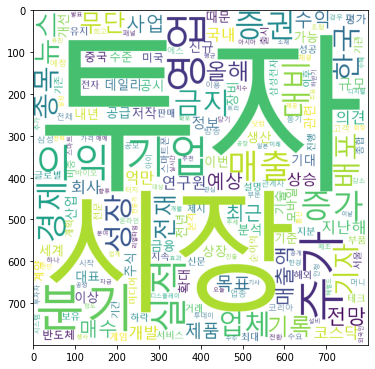

In [31]:
wc = WordCloud(font_path='malgun', width=400, height=400, scale=2.0, max_font_size=250,background_color='white')
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(6,8))

plt.imshow(gen)
wc.to_file('정상_워드클라우드.png')